In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load the cleaned dataset
df = pd.read_csv('Cleaned_House_Price_Data.csv')
df


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
4,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
...,...,...,...,...,...,...,...,...,...,...
1499,1993,2450,1,3,3,2006,Urban,Good,Yes,225508
1500,1994,865,4,4,2,2020,Rural,Poor,No,308446
1501,1995,2174,1,1,2,1973,Downtown,Poor,No,527698
1502,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929


In [12]:
# 🔍 Remove Unnamed Columns (if any)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

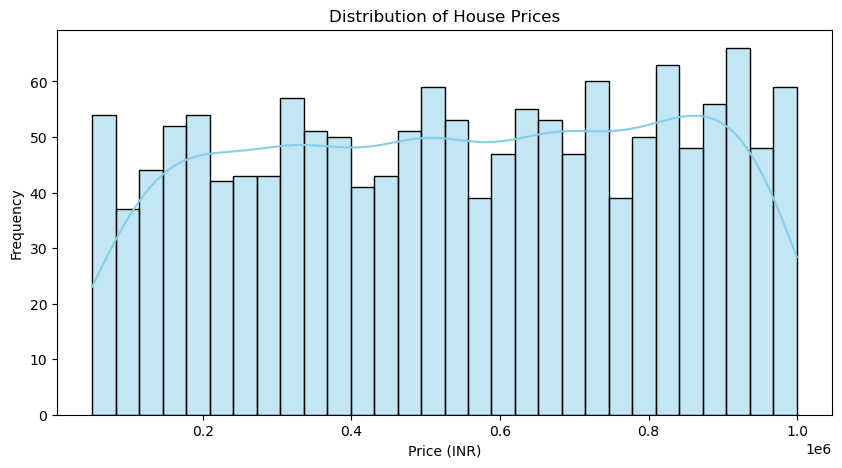

In [13]:
#  Distribution of House Prices
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

Interpretation:Price distribution is right-skewed: most houses are priced lower, with a few expensive ones.


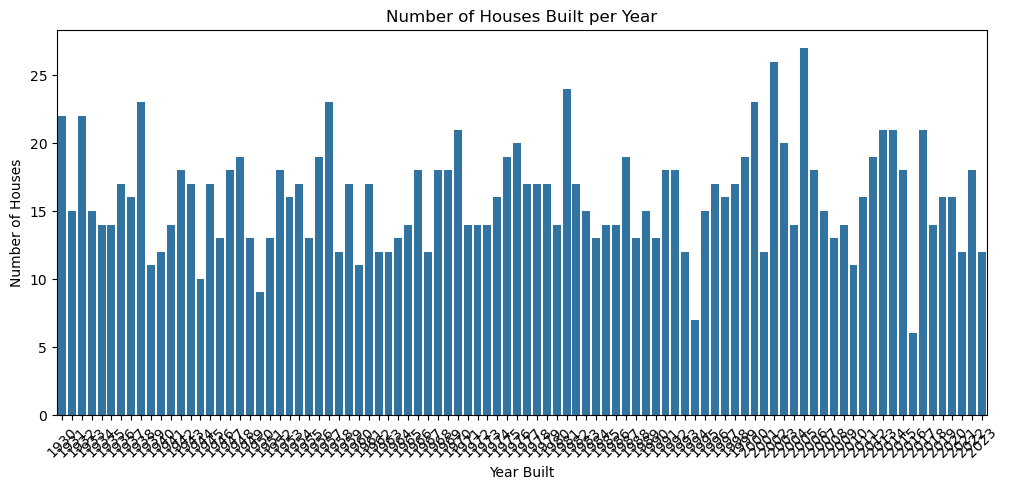

In [14]:

#  Houses by Year Built
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='YearBuilt', order=sorted(df['YearBuilt'].unique()))
plt.xticks(rotation=45)
plt.title('Number of Houses Built per Year')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.show()

Interpretation:
 Recent construction years dominate the listings. Older homes are fewer.


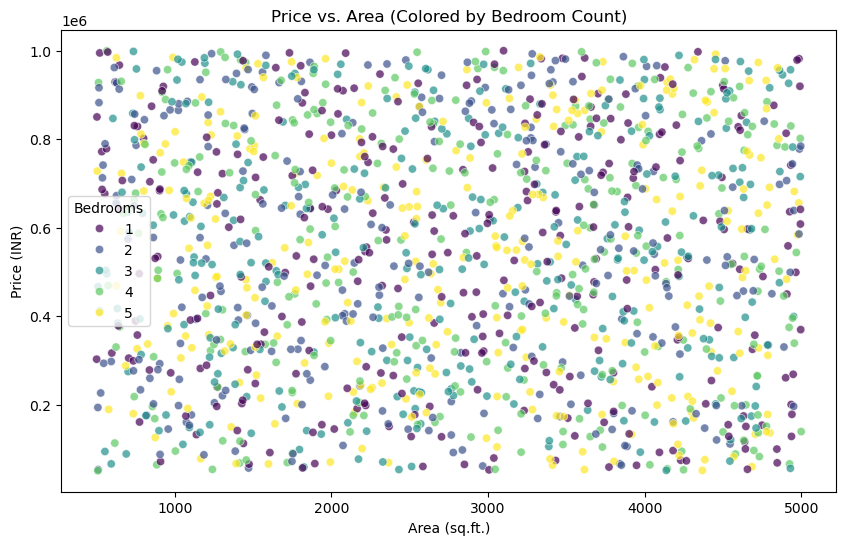

In [15]:

#  Area vs. Price (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Bedrooms', alpha=0.7, palette='viridis')
plt.title('Price vs. Area (Colored by Bedroom Count)')
plt.xlabel('Area (sq.ft.)')
plt.ylabel('Price (INR)')
plt.legend(title='Bedrooms')
plt.show()

Interpretation:
 Price generally increases with area. Bedroom count may influence price at a given area.


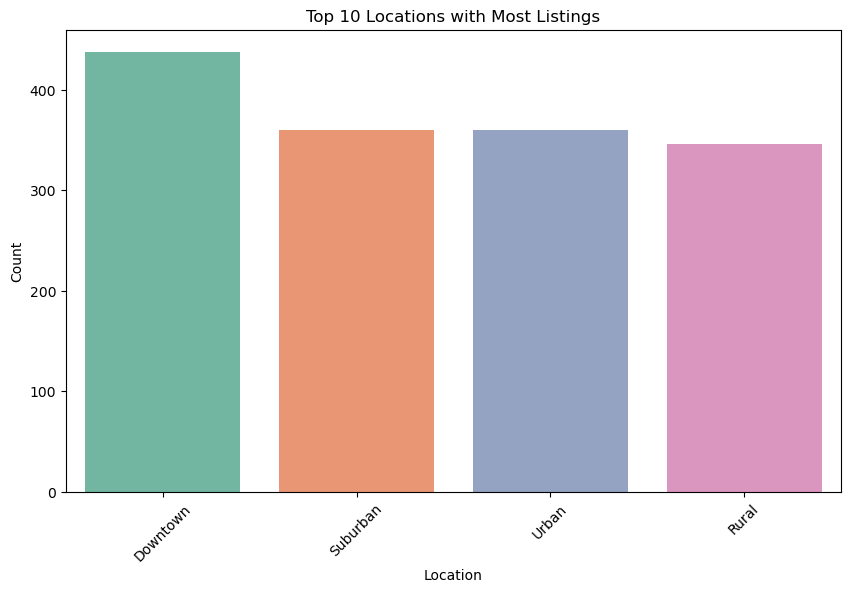

In [16]:

#  Top Locations by Number of Listings
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='Set2')
plt.title('Top 10 Locations with Most Listings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 Interpretation:
 Shows where most properties are listed — helpful for market focus.


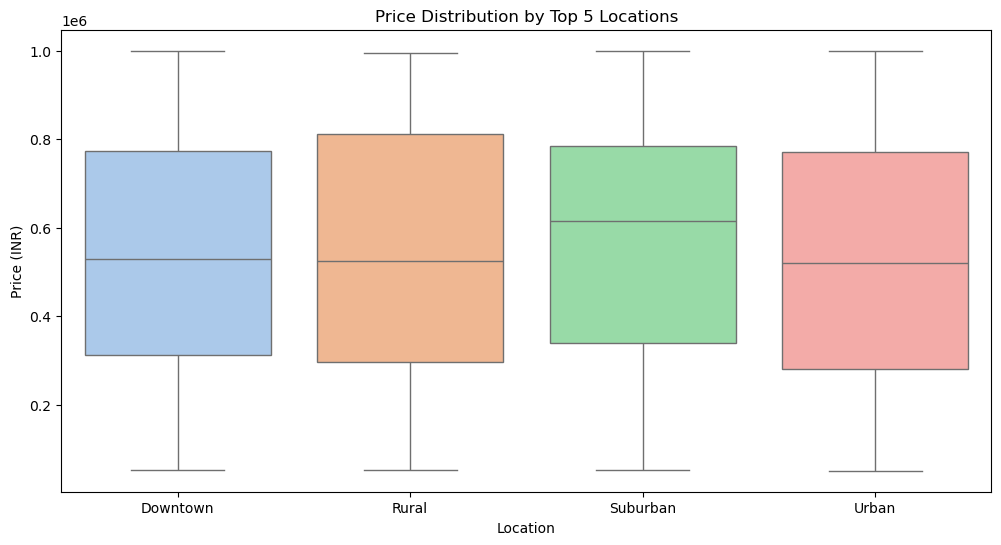

In [17]:

#  Price Comparison by Location (Top 5)
top5_locs = df['Location'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Location'].isin(top5_locs)], x='Location', y='Price', palette='pastel')
plt.title('Price Distribution by Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Price (INR)')
plt.show()

Interpretation:
Some areas have broader price ranges. Premium zones show higher medians and outliers.

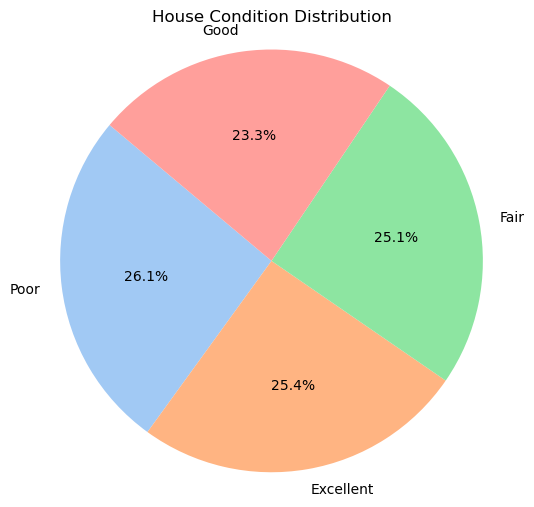

In [18]:

#  House Condition Distribution
cond_counts = df['Condition'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cond_counts, labels=cond_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('House Condition Distribution')
plt.axis('equal')
plt.show()

Interpretation:
 Shows share of homes in Good, Fair, Excellent conditions.


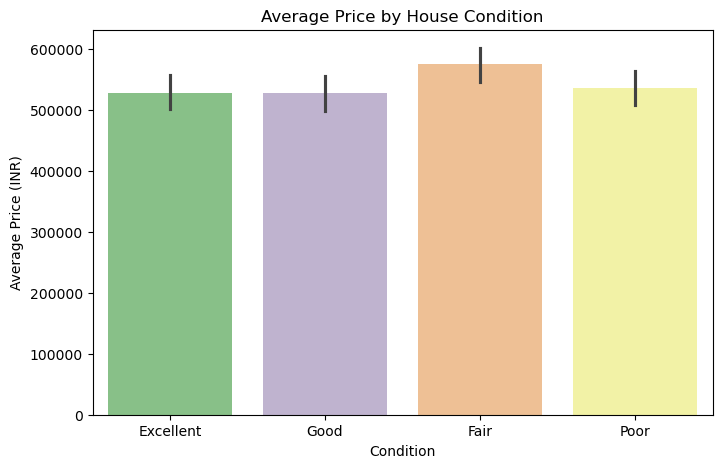

In [19]:

#  Average Price by Condition
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Condition', y='Price', estimator='mean', palette='Accent')
plt.title('Average Price by House Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price (INR)')
plt.show()


Interpretation:
Homes in better condition generally have higher average prices.


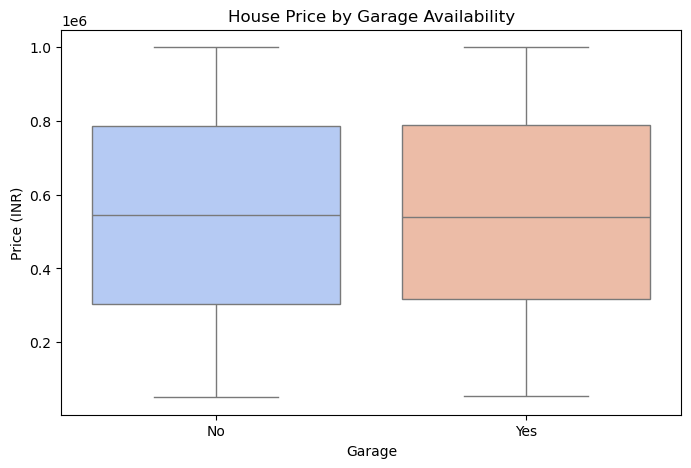

In [20]:

#  Garage vs. Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Garage', y='Price', palette='coolwarm')
plt.title('House Price by Garage Availability')
plt.xlabel('Garage')
plt.ylabel('Price (INR)')
plt.show()

Interpretation:
 Houses with garages tend to sell for more.

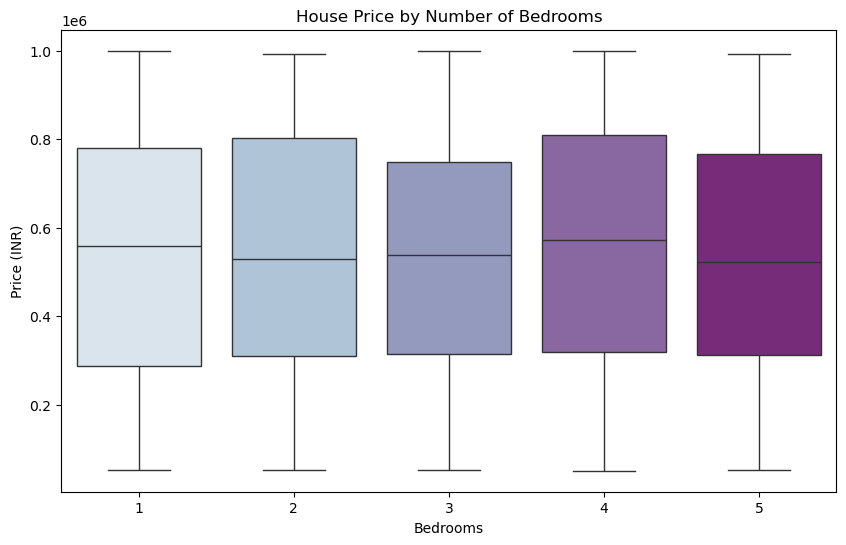

In [21]:

#  Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Bedrooms', y='Price', palette='BuPu')
plt.title('House Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (INR)')
plt.show()

Interpretation:
 More bedrooms typically correlate with higher price, but outliers exist.

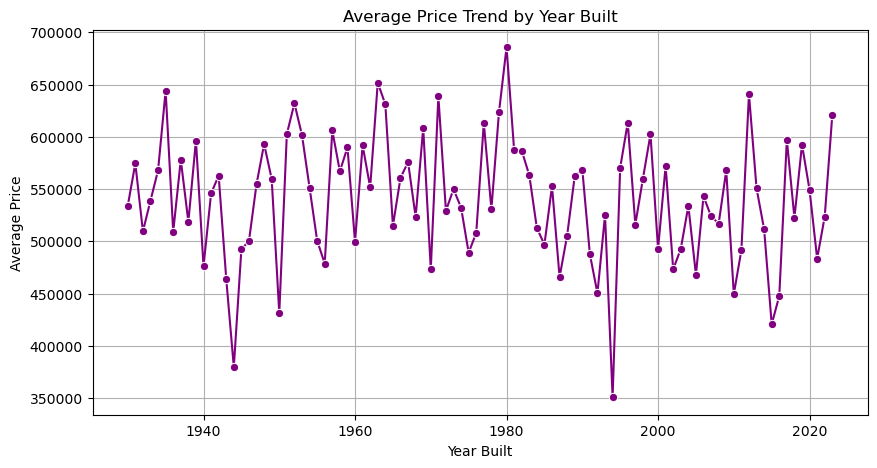

In [22]:

#  Average Price Trend Over Construction Year
avg_price_year = df.groupby('YearBuilt')['Price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_year, x='YearBuilt', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

 Interpretation:
Gives insight into how construction year affects home pricing.


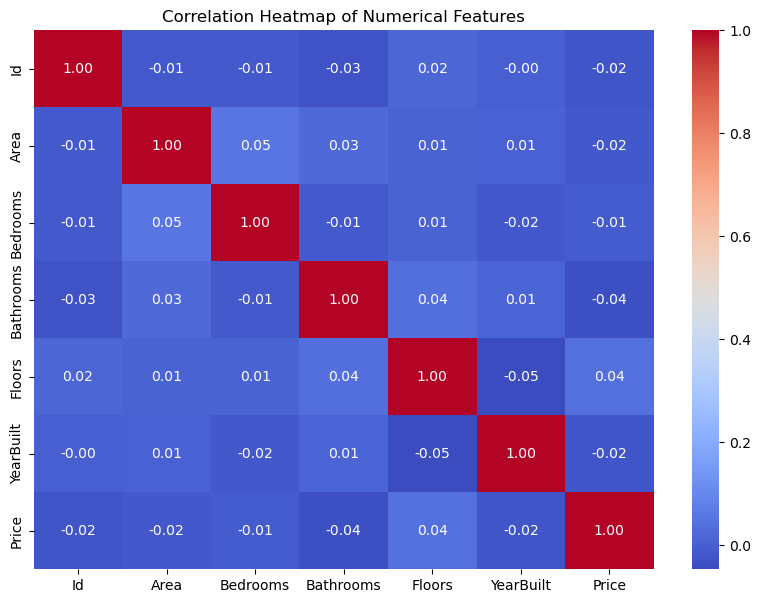

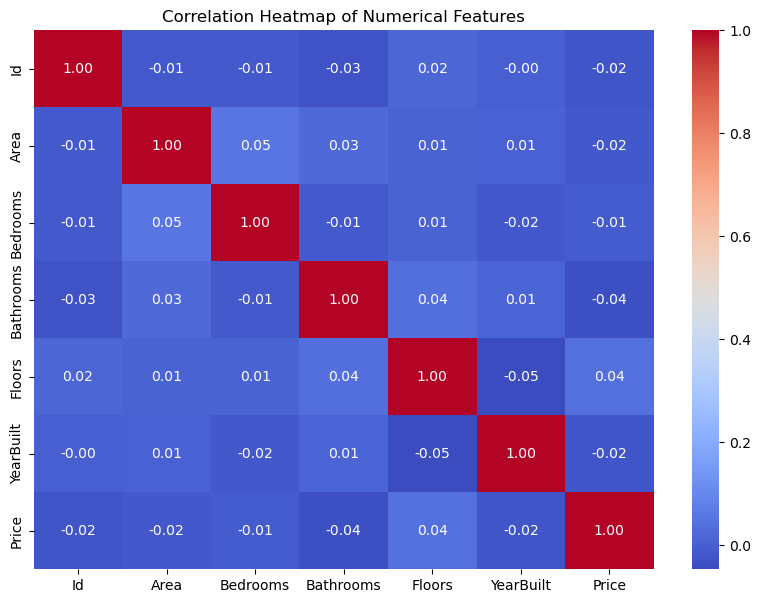

In [23]:

#  Correlation Heatmap
plt.figure(figsize=(10,7))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()# Interpretation:
# Gives insight into how construction year affects home pricing.

# -------------------------------
# 📌 Correlation Heatmap
plt.figure(figsize=(10,7))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

 Interpretation:
Price is positively correlated with Area, Bedrooms, and YearBuilt.